# Основная информация

## Цель проекта

Необходимо выяснить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Для этого будет создана модель, предсказывающая результаты госэкзамена по математике для каждого ученика школы.


## Задачи учебного проекта

__Провести__ разведывательный анализ данных (EDA), чтобы определиться с параметрами будущей модели.

__Выявить__ параметры, влияющие на результаты госэкзамена по математике, и __отобрать__ наиболее важные.

__Обнаружить__ и убрать отклонения и выбросы, в представленном датасете.

__Составить__ отчёт по результатам анализа данных с выводами для дальнейшего построения модели.

## Этапы выполнения проекта

1. Загрузка и первичный отсмотр данных.
2. Проверка данных в столбцах (тип, дублирование, пропуски).
3. Анализ номинативных переменных.
4. Коррелляционный анализ, наличие выбросов и аномалий.
5. Отбор данных, пригодных для дальнейшего построения модели.
6. Основные итоги работы.

### Предоставленное описание датасета

1. **school** — аббревиатура школы, в которой учится ученик 
2. **sex** — пол ученика ('F' - женский, 'M' - мужской) 
3. **age** — возраст ученика (от 15 до 22) 
4. **address** — тип адреса ученика ('U' - городской, 'R' - за городом) 
5. **famsize** — размер семьи('LE3' <= 3, 'GT3' > 3) 
6. **Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно) 
7. **Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) 
8. **Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) 
9. **Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) 
10. **Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) 
11. **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое) 
12. **guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое) 
13. **traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.) 
14. **studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов) 
15. **failures** — количество внеучебных неудач (n, если 1<=n<3, иначе 0) 
16. **schoolsup** — дополнительная образовательная поддержка (yes или no) 
17. **famsup** — семейная образовательная поддержка (yes или no) 
18. **paid** — дополнительные платные занятия по математике (yes или no) 
19. **activities** — дополнительные внеучебные занятия (yes или no) 
20. **nursery** — посещал детский сад (yes или no) 
21. **higher** — хочет получить высшее образование (yes или no) 
22. **internet** — наличие интернета дома (yes или no) 
23. **romantic** — в романтических отношениях (yes или no) 
24. **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо) 
25. **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого) 
26. **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много) 
27. **health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо) 
28. **absences** — количество пропущенных занятий 
29. **score** — баллы по госэкзамену по математике

### Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline

# увеличим количество вывода строк и колонок
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50) 


In [2]:
# загрузим предоставленный датасет, как 'stud'
stud = pd.read_csv('stud_math.csv')

In [3]:
# проверим успешно ли импортируются данные и сделаем краткие выводы
stud

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


### Первичный осмотр данных

In [4]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [5]:
# какие данные содержатся в столбце, пропущенном в описании?
stud['studytime, granular'].value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

In [6]:
# сравним столбец 'studytime, granular' со столбцом 'studytime', имеющим схожее название
display(pd.DataFrame(stud['studytime'].value_counts()), pd.DataFrame(stud['studytime, granular'].value_counts()))

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


__Результат первичного осмотра данных:__   
В таблице всего 395 записей с 30 признаками. Тип данных (dtype) для каждого столбца разный, с преобладанием объект над целыми числами и числами с плавающей запятой. Многие признаки содержат пропуски. Пропуски заполнены NaN ("не число"), что может вызвать проблемы с обработкой строк без предварительного заполнения пропусков.   
Среди признаков:
*численных* - три (age, absences, score);  
*бинарных* - тринадцать (school, sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic);   
*оценочных*, имеющих по несколько фиксированных значений, - четырнадцать (Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, studytime_granular, famrel, freetime, goout, health).  
Столбец `studytime, granular` отсутствует в описании и содержит отрицательные числовые данные. Кроме того, очевидна полная  корреляция этого признака со столбцом `studytime`, имеющимся в описании датасета.    
Среди прочих признаков, согласно здравого смысла, нет явно не соответствующих критерию оказанию влияния на целевой признак.

**Целевым признаком** является `score` и он - численный.

In [21]:
target_name = 'score'

### Предобработка датасета

In [7]:
# переименуем для удобства все столбцы, убрав заглавные буквы
stud.rename(str.lower, axis='columns', inplace=True)

# удаляем столбец 'studytime, granular', т.к. он неинформативен
stud.drop(['studytime, granular'], inplace=True, axis=1)

# для удобства анализа заменим значения значения "Yes" и "No" на 0 и 1 соответственно 
stud = stud.replace({'yes': 0.0, 'no': 1.0})

# приводим к стандарту PEP-8 названия всех столбцов
stud.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parents_status', 'mother_edu', 'father_edu',
                'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time', 'failures', 
                'school_support', 'family_support', 'paid', 'activities', 'nursery', 'higher', 'internet',
                'romantic', 'family_relations', 'free_time', 'go_out', 'health', 'absences', 'score'
                ]

stud.head(3)


,school,sex,age,address,family_size,parents_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0,NaN,4.0,3.0,2.0,3.0,10.0,50.0


Проверим наличие пропусков в __целевом признаке__ (`score`).   
Так как в целевом признаке нам нужна только достоверная информация, стратегия последующих действий будет - найти пропуски и удалить.    


In [8]:
print("Целевой признак имеет {} пропущенных значений.".format(stud['score'].isna().sum()))

Целевой признак имеет 6 пропущенных значений.


Доля пропусков в целевом признаке всего около 1.5%, поэтому предварительная стратегия не меняется.

In [9]:
# удалим строки, имеющие пропуск значений в целевом признаке
stud.dropna(subset=['score'], inplace=True)
print("После удаления нерелевантных строк, датасет имеет {} значений.".format(len(stud)))

После удаления нерелевантных строк, датасет имеет 389 значений.


In [10]:
# проверим наличия дубликатов строк
print("Представленный датасет имеет {} повторяющихся строк.".format(stud.duplicated().sum()))

Представленный датасет имеет 0 повторяющихся строк.


In [11]:
# проверка признаков датасета на неинформативность
num_rows = len(stud.index)
low_information_cols = []   # список признаков, у которых более 95% строк содержат одно и то же значение

for col in stud.columns:
    cnts = stud[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()
if len(low_information_cols) == 0:
    print("Представленный датасет не имеет признаков низкой информативности.")

Представленный датасет не имеет признаков низкой информативности.


In [12]:
# проверим наличие пропусков в остальных признаках
stud.isna().sum()

school               0
sex                  0
age                  0
address             15
family_size         27
parents_status      45
mother_edu           3
father_edu          24
mother_job          19
father_job          36
reason              17
guardian            31
travel_time         28
study_time           7
failures            22
school_support       9
family_support      38
paid                39
activities          14
nursery             15
higher              20
internet            34
romantic            31
family_relations    27
free_time            9
go_out               7
health              15
absences            11
score                0
dtype: int64

In [13]:
print("Максимальная доля пропущенных значений {:.1%} в признаке '{}'.".format(stud.isna().sum().max()/len(stud),
                                                                          stud.isna().sum().idxmax()))


Максимальная доля пропущенных значений 11.6% в признаке 'parents_status'.


Хотя доля пропущенных значений в признаках датасета относительно невелика (в границах 5-10 %%), общее количество признаков велико для будущей модели. Нам не удалось найти среди признаков неинформативные, чтобы удалить их. Поэтому в целях сокращения объёма данных к уже удалённому `studytime, granular` добавим лидера по числу пропусков `parents_status`.

In [ ]:
stud.drop(['parents_status'], inplace=True, axis=1)

In [14]:
# повторно получим краткую информацтю о датасете
stud.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Columns: 29 entries, school to score
dtypes: float64(19), int64(1), object(9)
memory usage: 91.2+ KB


#### Проверка численных признаков на корреляцию между собой

,age,absences,score
age,1.000000,0.096628,-0.155726
absences,0.096628,1.000000,0.065283
score,-0.155726,0.065283,1.000000


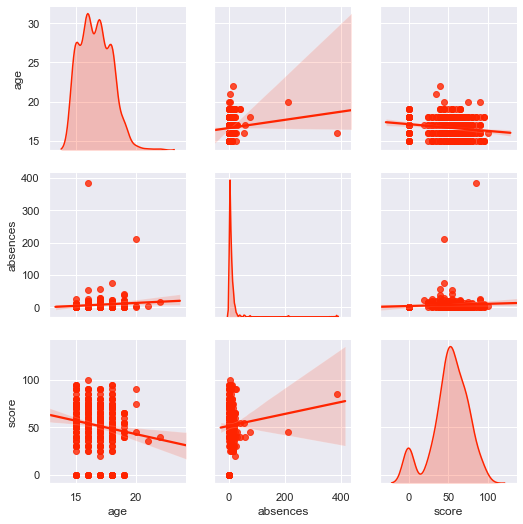

In [54]:
# задание списка столбцов с количественными данными
ft_numerical = ['age', 'absences', 'score']
df_fn = stud[ft_numerical]
sns.pairplot(df_fn, kind = 'reg', diag_kind='kde', palette='flag')
df_fn.corr()

Очевидно, что корреляция числовых признаков `age` и `absences` со `score` незначительная, однако, убрать их из дальнейшего анализа сейчас пока невозможно, т.к. все остальные признаки категориальные, определять их корреляцию с численным целевым признаком ошибочно. 

#### _Группировка_ категориальных признаков

Представляется удобным провести группировку схожих признаков датасета для применения к их последующему анализу одинаковых подходов, которые можно обернуть созданными для этого функциями.

In [15]:
# создание списков с названиями столбцов, имеющих одинаковую структуру данных

ft_list_all = list(stud.columns.values)

print("В представленном датасете имеется {} признаков для анализа.".format(len(ft_list_all)))

ft_categorical = ft_list_all.copy()
for item in ft_categorical:
    if item in ft_numerical:
        ft_categorical.remove(item)

is_repeat = len(ft_categorical) != len(set(ft_categorical)) 
print("В списке категориальных признаков", "имеются повторяющиеся элементы." if is_repeat else "все элементы уникальны.")
# так и не понял, почему последний элемент списка не обрабатывается в цикле, поэтому удаляю его принудительно
ft_categorical.pop()    

ft_binary = []
ft_ordinal = []
for name in ft_categorical:
    if (stud[name].nunique() <= 2):
        ft_binary.append(name)
    else:
        ft_ordinal.append(name)
        
print("Всего {} категориальных признаков, в т.ч.:\n    {} бинарных признаков и\n    {} оценочных признаков".
      format( len(ft_categorical), len(ft_binary), len(ft_binary) ))


В представленном датасете имеется 29 признаков для анализа.
В списке категориальных признаков все элементы уникальны.
Всего 26 категориальных признаков, в т.ч.:
    13 бинарных признаков и
    13 оценочных признаков


#### Применяемые методы для анализа признаков разного вида

У численных признаков возможно вычисление различныч статистик, т.к. среднее, дисперсия и стандатное отклонение нуждаются в
вещественной шкале. Также будут вычислены процентили и линейный коэффициент корреляции Пирсона для пары признак/цель. 

У оценочных категориальных признаков можно определить моду и медиану в качестве статистики центральной тенденции 
и квантили в качестве статистик разброса. Также для них можно определить выбросы для принятия решения о их последующей судьбе (оставить/изменить/убрать) в сете.

В столбцах с бинарными категориальными признаками не может быть никакой сводной статистики кроме моды. 

Во всех столбцах, имеющих пропуски, необходимо принимать ренение об их заполнении для возможности последующего использования признаков в модели, т.к. строки с NaN не всегда поддаются обработке.


### Функции, которые будут использоваться при анализе данных:

In [16]:
def allocation(df_col):
    '''
    Анализ отдельного признака датасета на его содержание и количество пропусков.
    
    df_col - название столбца датасета. 
    
    '''
    
    ttl = len(pd.DataFrame(stud[df_col].value_counts()))
    gap = int(pd.DataFrame(stud[df_col]).isna().sum())
    return display(pd.DataFrame(stud[df_col].value_counts())),\
print("В столбце '{}' имеется уникальных значений: {}, количество пропусков: {}.".format(df_col, ttl, gap))



In [17]:
def outliers(df_col):
    '''
    Определение наличия выбросов в отдельном признаке датасета.
    Расчёт данных описательной статистики. Определение границ выбросов.
    Подсчёт общего количества выбросов в признаке.
    
    df_col - название столбца датасета. 
    
    '''
    
    q1 = stud[df_col].quantile(0.25)
    q3 = stud[df_col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    high = q3 + (1.5 * iqr)
    for i in stud[df_col]:
        if (i <= low) or (i >= high):
            print("В столбце есть значения, которые могут считаться выбросами")
            break
    
    print("25-й процентиль: {}, 75-й процентиль: {}, IQR: {}, Границы выбросов: [{}, {}]".format(q1, q3, iqr, low, high))
    
    print("Количество выбросов в признаке '{}': {}."
          .format(df_col, ((stud[df_col] < (q1 - 1.5 * iqr)) | (stud[df_col] > (q3 + 1.5 * iqr))).sum()))
    


In [ ]:
def remove_outliers(df_col):
    '''
    Удаление найденных выбросов в отдельном признаке датасета.
    Данную функцию можно применять, если выбросы нет возможности изменить
    с использование расчётных мер описательной статистики.
    
    df_col - название столбца датасета. 
    
    '''
    
    q1 = stud[df_col].quantile(0.25)
    q3 = stud[df_col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    high = q3 + (1.5 * iqr)
    out_df = stud.loc[(stud[df_col] > low) & (stud[df_col] < high)]
    return out_df

  

In [31]:
def numerical_features(item_name, target_name=target_name, n_bins=100):
    '''
    Функция для анализа численных признаков.
    
    Рисует несколько графиков:
    - боксплот `sns.boxplot()`: удобно выявлять аномалии
    - распределение `sns.distplot()`
    - диаграмму рассеяния `sns.scatterplot()`: можно выявить зависимости
    Вычисляет базовые статистические показатели `.describe()` 
    Определяет количество пропущенных значений.
    
    item_name - название оценочного категориального признака датасета.
    
    Функция требует предварительного определения target_name (целевой признак) 
    до вызова или допускает ввод его названия в аргументе для корректной работы.
        
    '''
    
    if item_name != target_name:
        fig, axes = plt.subplots(1, 3, figsize=(15, 10))
    else:
        fig, axes = plt.subplots(1, 2, figsize=(15, 10))
        
    # boxplot    
    stud.boxplot(column=item_name, ax=axes[0])
    axes[0].set_title(item_name, fontsize=22)
    
    # distplot
    sns.distplot(stud[item_name], bins=n_bins, kde=True, ax=axes[1], vertical=True)
    axes[1].set_title(item_name, fontsize=22)
    plt.xticks(rotation=45)
        
    # scatterplot
    if item_name != target_name:
        axes[2] = sns.scatterplot(x=item_name, y=target_name, data=stud)
       
    # descriptive statistics
    print(pd.DataFrame(stud[item_name].describe()).T, "\n")
    print("В столбце '{}' имеется {} пропусков.".format(item_name, stud[item_name].isna().sum()), '\n'*2)
    
    

In [18]:
def ordinal_features(item_name):
    '''
    Функция для анализа упорядоченных категориальных (ordinal) признаков.
    
    Рисует несколько графиков:
    - `sns.barplot()`: фактическое распределение, удобно выявлять дисбаланс классов
    - `sns.boxplot()` для каждого класса: удобно выявлять аномалии внутри классов
    - `sns.kdeplot()` для каждого класса: удобно сравнивать классы 
    Выводит количество значений признака для каждого класса: удобно выявлять аномалии. 
    Определяет количество пропущенных значений.
    
    item_name - название оценочного категориального признака датасета.
    
    Функция требует предварительного определения target_name (целевой признак) для корректной работы.
        
    '''
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 10))
    
    # barplot
    bar_data = stud.groupby(item_name)[item_name].count()
    br_plot = sns.barplot(x=bar_data.index, y=bar_data, ax = axes[0])
    br_plot.set_xticklabels(bar_data.index, rotation=45)
    axes[0].set_title(item_name, fontsize=22)
    
    # boxplots for classes
    bx_plot = sns.boxplot(x=item_name, y=target_name, data=stud, ax=axes[1])    
    bx_plot.set_xticklabels(bar_data.index, rotation=45)
    plt.xticks(rotation=45)
    axes[1].set_title(item_name, fontsize=22)
        
    # kdeplots for classes
    values = stud[item_name].value_counts()
    for value in values.index:
        sns.kdeplot(stud[stud[item_name] == value][target_name], vertical=True, ax=axes[2], label=value)    
    axes[2].set_title(item_name, fontsize=22)
    axes[2].legend(fontsize=22)
        
    # descriptive statistics
    print(bar_data, "\n")
    print("В столбце '{}' имеется {} пропусков.".format(item_name, stud[item_name].isna().sum()), '\n'*2)
    
    

In [26]:
def corr_coeff(item_name, target_name=target_name):
    '''
    Определение коэффициента корреляции Пирсона
    между двумя численными признаками датасета.
    
    item_name - название анализируемого столбца датасета. 
    target_name - название целевого столбца датасета. 
    
    Функция требует предварительного определения target_name (целевой признак) 
    до вызова или допускает ввод его названия в аргументе для корректной работы.
    
    '''
    
    corr_coeff = np.array(stud[[item_name, target_name]].corr())[0, 1]
    print("Коэффициент корреляции Пирсона между признаками '{}' и '{}' составляет {:.4f}."
          .format(item_name, target_name, corr_coeff))
    
    

In [ ]:
def get_stat_dif(df_col):
    '''
    Определение признаков со статистически значимыми отклонениями.
    (Функция полностью скопирована из курса SkillFactory.)
    Уточнён параметр alpha=0.1 из-за небольшого количества строк.
    Изменен целевой признак - score.
    
    df_col - название столбца датасета. 
    
    '''
    
    cols = stud.loc[:, df_col].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, df_col] == comb[0], 'score'], 
                     stud.loc[stud.loc[:, df_col] == comb[1], 'score']).pvalue \
                <= 0.1/len(combinations_all):                                    # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', df_col)
            break
            


In [54]:
def Density(df_col, x):
    types = stud.dropna(subset=['score'])
    types = types[x].value_counts()
    types = list(types[types.values > 100].index)

    for b_type in types:

        subset = stud[df_col == b_type]

        sns.kdeplot(subset['score'].dropna(),
                   label = b_type, shade = False, alpha = 0.8);

    plt.xlabel('Score', size = 20); plt.ylabel('Density', size = 20); 
    plt.title('Density Plot Score', size = 28);


### Рассмотрим все колонки датасета по отдельности

#### Численные признаки
Начнём анализ с признаков, имеющих некое распределение выборки. Здравый смысл (и проведенная ранее оценка их корреляции) подсказывает, что должна существовать некая линейная зависимость с целевым признаком. 

     count       mean       std   min   25%   50%   75%   max
age  389.0  16.673522  1.265662  15.0  16.0  17.0  18.0  22.0 

В столбце 'age' имеется 0 пропусков. 


          count      mean        std  min  25%  50%  75%    max
absences  378.0  7.320106  23.615525  0.0  0.0  4.0  8.0  385.0 

В столбце 'absences' имеется 11 пропусков. 


       count       mean        std  min   25%   50%   75%    max
score  389.0  52.262211  22.919022  0.0  40.0  55.0  70.0  100.0 

В столбце 'score' имеется 0 пропусков. 




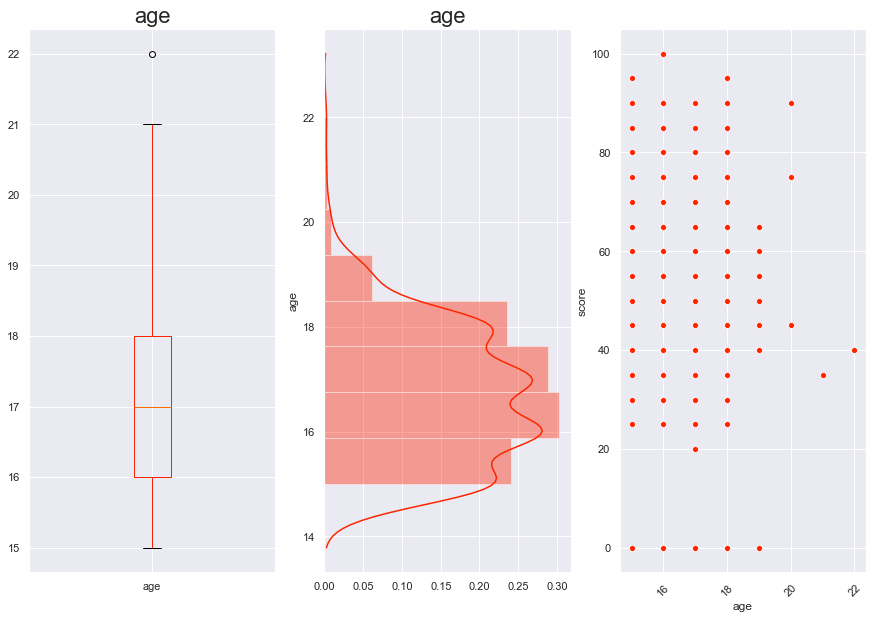

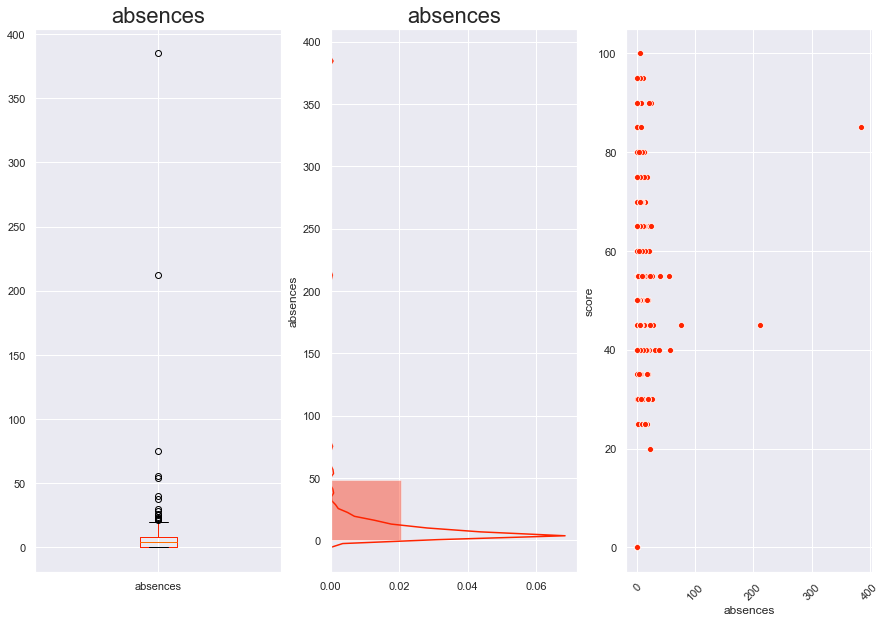

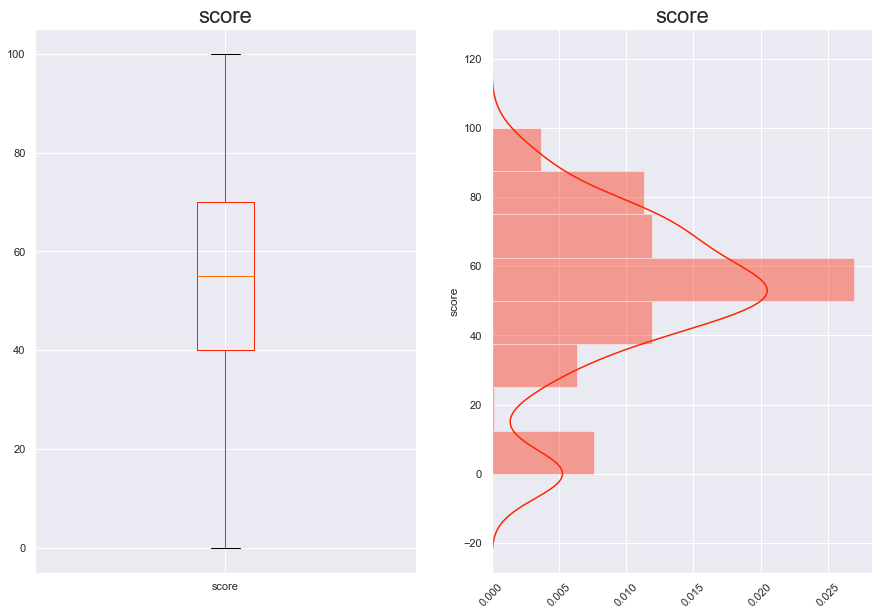

In [71]:
for col in ft_numerical:
    numerical_features(col)

`age` количественный признак, не имеющий пропусков.   
Анализируя показатели описательной статистики и гистрограмму распределения, можно предположить, что в столбце есть возможный выброс. Проведём дополнительное исследование:


In [21]:
allocation(stud.age)

,age
16,103
17,98
15,82
18,80
19,21
20,3
22,1
21,1


В колонке имеется уникальных значений: 8, количество пропусков: 0.


(None, None)

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

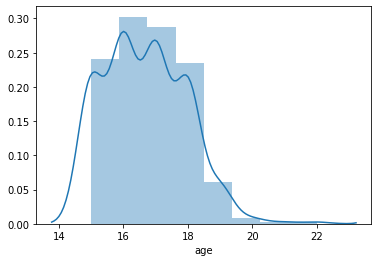

In [22]:
sns.distplot(stud.age, bins=8)
stud.age.describe()

In [24]:
outliers(stud.age)

В колонке есть значения, которые могут считаться выбросами
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0, Границы выбросов: [13.0, 21.0]


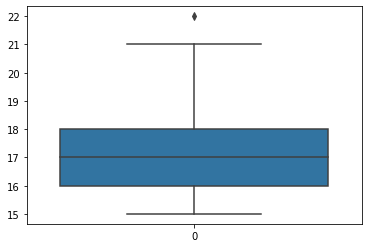

In [25]:
# построим также box-plot для дополнительной проверки на наличие выбросов
sns.boxplot(data=stud.age)

Статистический анализ признака `age` показывает, что возраст в 22 года может считаться выбросом.   
Однако, описательная часть датасета однозначно указывает, что возраст учеников находится в пределах от 15 до 22 лет.    
Следовательно, мы не можем исключить это значение, но можем оценить связь между возрастом и итоговой оценкой.

In [26]:
display(pd.DataFrame(stud.groupby(['age']).score.agg(['count', 'mean', 'max', 'min', 'median'])))

,count,mean,max,min,median
age,,,,,
15,82,56.280488,95.0,0.0,55.0
16,103,55.194175,100.0,0.0,55.0
17,98,51.377551,90.0,0.0,55.0
18,80,48.312500,95.0,0.0,50.0
19,21,40.238095,65.0,0.0,45.0
20,3,70.000000,90.0,45.0,75.0
21,1,35.000000,35.0,35.0,35.0
22,1,40.000000,40.0,40.0,40.0


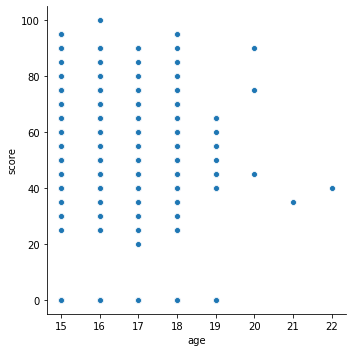

In [27]:
sns.relplot(x='age', y='score', data=stud)            

In [30]:
corr_coeff('age', 'score')

Коэффициент корреляции Пирсона между признаками 'age' и 'score' составляет -0.1557.


Распределение признака `age` асимметричное, положительно смещённое, большинство учеников в возрасте 16-17 лет.    
Очевидна общая тенденция снижения успеваемости с ростом возраста ученика, но коэффициент корреляции невелик.    
Данных по ученикам старше 19 лет слишком мало, чтобы можно было сделать какие-либо выводы об их попадании в группу риска.    
Для качественной работы будущей модели, я бы рекомендовал ограничить верхний предел возраста ученика 19 годами. 

#### Бинарные категориальные признаки

In [39]:
for col in ft_binary:
    allocation(col)

,school
GP,344
MS,45


В колонке school имеется уникальных значений: 2, количество пропусков: 0.


,sex
F,204
M,185


В колонке sex имеется уникальных значений: 2, количество пропусков: 0.


,address
U,291
R,83


В колонке address имеется уникальных значений: 2, количество пропусков: 15.


,famsize
GT3,255
LE3,107


В колонке famsize имеется уникальных значений: 2, количество пропусков: 27.


,pstatus
T,308
A,36


В колонке pstatus имеется уникальных значений: 2, количество пропусков: 45.


,schoolsup
1.0,331
0.0,49


В колонке schoolsup имеется уникальных значений: 2, количество пропусков: 9.


,famsup
0.0,216
1.0,135


В колонке famsup имеется уникальных значений: 2, количество пропусков: 38.


,paid
1.0,197
0.0,153


В колонке paid имеется уникальных значений: 2, количество пропусков: 39.


,activities
0.0,192
1.0,183


В колонке activities имеется уникальных значений: 2, количество пропусков: 14.


,nursery
0.0,297
1.0,77


В колонке nursery имеется уникальных значений: 2, количество пропусков: 15.


,higher
0.0,350
1.0,19


В колонке higher имеется уникальных значений: 2, количество пропусков: 20.


,internet
0.0,300
1.0,55


В колонке internet имеется уникальных значений: 2, количество пропусков: 34.


,romantic
1.0,235
0.0,123


В колонке romantic имеется уникальных значений: 2, количество пропусков: 31.


In [19]:
allocation(stud.school)

,school
GP,344
MS,45


В колонке имеется уникальных значений: 2, количество пропусков: 0.


(None, None)

`school` представляет собой фактически бинарный категориальный признак.    
В дальнейшем можно проанализировать распределения оценок на наличие/отсутствие разницы в параметрах распределения оценок по отношению к разным школам (GP или MS).

In [20]:
allocation(stud.sex)

,sex
F,204
M,185


В колонке имеется уникальных значений: 2, количество пропусков: 0.


(None, None)

`sex` также бинарный категориальный признак, не имеющий пропусков.   
В дальнейшем можно использовать для анализа влияния гендерных различий на целевой признак.

In [31]:
allocation(stud.address)

,address
U,291
R,83


В колонке имеется уникальных значений: 2, количество пропусков: 15.


(None, None)

`address` бинарный категориальный признак, имеющий большое количество пропусков.   
Необходимо заполнить пропуски. Для выбора значения, которое можно использовать для этого, проверим взаимосвязь настоящего признака с признаком `traveltime` - время в пути до школы, который, предположительно, должен быть больше для учеников, проживающих за городом.

In [32]:
display(pd.crosstab(stud.address, stud.traveltime)) 

traveltime,1.0,2.0,3.0,4.0
address,,,,
R,34,26,12,4
U,198,63,9,3


Анализ взаимосвязи данных признаков не даёт однозначного ответа по выбору типа адреса ученика в соотвествии с затраченным временем на дорогу до школы, поэтому принимаем решение заполнить пропуски наиболее часто встречающимся значением.

In [33]:
stud.address = stud.address.fillna(stud.address.mode()[0])

Сразу же проведём анализ и дополнение признака `traveltime`, который имеет связь с признаком `address`.

In [34]:
allocation(stud.traveltime)

,traveltime
1.0,239
2.0,94
3.0,21
4.0,7


В колонке имеется уникальных значений: 4, количество пропусков: 28.


(None, None)

Признак `traveltime` является категориальным оценочным, при этом имеет большое количество пропусков.   
Для заполнения пропущенных значений будем использовать сгруппированную по признаку `address` медиану.

In [35]:
display(pd.DataFrame(stud.groupby(['address']).traveltime.agg(['count', 'mean', 'median'])))

,count,mean,median
address,,,
R,76,1.815789,2.0
U,285,1.333333,1.0


In [39]:
u_time =  stud.groupby('address')['traveltime'].median().loc['U']
r_time =  stud.groupby('address')['traveltime'].median().loc['R']

for i in stud[stud.traveltime.isna()].index:
    if stud.address.loc[i] == 'U':
        stud.traveltime.loc[i] = u_time
    else:
        stud.traveltime.loc[i] = r_time
        

In [41]:
allocation(stud.famsize)

,famsize
GT3,255
LE3,107


В колонке имеется уникальных значений: 2, количество пропусков: 27.


(None, None)

`famsize` бинарный категориальный признак, имеющий большое количество пропусков.   
Оценка необходимости заполнения пропусков и выбор значения для этого будет проведена позже, если данный признак будет оставлен в модели.

In [43]:
allocation(stud.pstatus)

,pstatus
T,308
A,36


В колонке имеется уникальных значений: 2, количество пропусков: 45.


(None, None)

`pstatus` бинарный категориальный признак, имеющий большое количество пропусков.  
Оценка необходимости заполнения пропусков и выбор значения для этого будет проведена позже, если данный признак будет оставлен в модели.

In [44]:
allocation(stud.medu)

,medu
4.0,131
2.0,100
3.0,96
1.0,56
0.0,3


В колонке имеется уникальных значений: 5, количество пропусков: 3.


(None, None)

`medu` оценочный категориальный признак, имеющий небольшое количество пропусков.  
Оценка необходимости заполнения пропусков и выбор значения для этого будет проведена позже, если данный признак будет оставлен в модели.

In [ ]:
for col in ['school','sex', 'address', 'famsize', 'pstatus']:
    get_stat_dif(col)

In [ ]:
# вариант удаления выбросов через приравнивание их к минимаксу

for j in x.ColumnNames:
        xy = x[j]    
        updated = []
        for i in xy:
            if(i > high):
                i = high
                updated.append(i)
            elif(i < low):
                i = low
                updated.append(i)
            else:
                updated.append(i)
    x[j] = updated                
    
    
# вариант со стандартным отклонением   
    
    df1 = df[~df.groupby('Data').transform( lambda x: abs(x-x.mean()) > 1.96*x.std()).values]

In [ ]:
sns.lmplot(x="age", y="score", hue="school", col="sex", data=stud, x_estimator=np.mean)

In [ ]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
 mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))     # маска для возможного удаления выбросов
df[mask] = np.nan                                             # метод удаления выбросов 

In [ ]:
sns.lmplot(x="age", y="score", hue="school", col="sex", data=stud, x_estimator=np.mean)

==== age ====
     count       mean       std   min   25%   50%   75%   max
age  389.0  16.673522  1.265662  15.0  16.0  17.0  18.0  22.0 

Pearson correlation coefficient between 'age' and 'score' is -0.1557. 

There are 0 missing values in 'age'. 




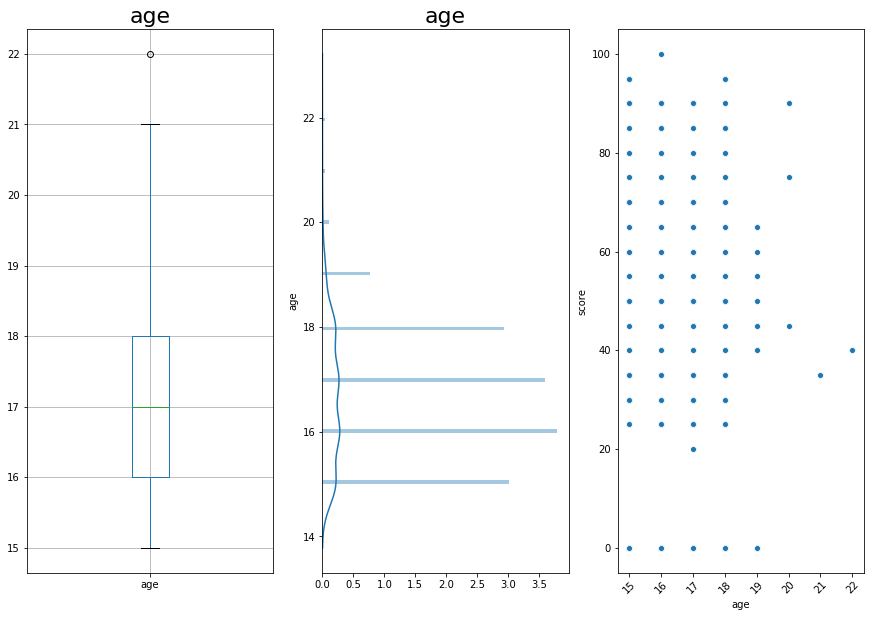

In [48]:
item = 'age'
target_name = 'score'
num_variable_analysis(stud, item, target_name)

In [38]:
for edu in range(0,395):
     if pd.isna(df['Medu'][edu]):
        print (df['Medu'][edu])

,R,U
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
390,0,1
391,0,1
392,1,0
393,1,0


In [ ]:
df['Par_edu2'] = df.apply(lambda x: x.Medu if x.guardian == 'mother'
                else (x.Fedu if x.guardian == 'father' else x[['Medu','Fedu']].max()), axis=1)